# Forest Fires Data Exploration

In this notebook, we embark on a comprehensive exploration of forest fires dataset. Our journey begins with the importation of essential libraries and the loading of the dataset.

# Import Libraries and Packages

To kickstart our data exploration, we import the necessary libraries and packages for visualization:

In [48]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from scipy import stats

datafile = pd.read_csv("../data/raw/forestfires.csv")

# Dataset Overview:

Before delving into the exploratory analysis, let's take a quick glance at the structure and content of our dataset:

In [49]:
# Find out the datatypes of each column and see if there are any missing valuse in the datase
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [50]:
# Print out the summary statistics of all numeric columns
datafile.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [51]:
# Display how many rowns and columns there are
datafile.shape

(517, 13)

In [52]:
# Extract the feauture name from the dataset 
datafile.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

# Visualizing Forest Fires Data:

Our exploration will involve creating visualizations to better understand the distribution of data and potential relationships between variables. We'll start by exploring basic statistical summaries and visualizations inside the column of area burned since it will be the Y of our linear regression. By looking how the data is distribued and its values we will be able to understand this phenomenon a bit more.

<Axes: ylabel='area'>

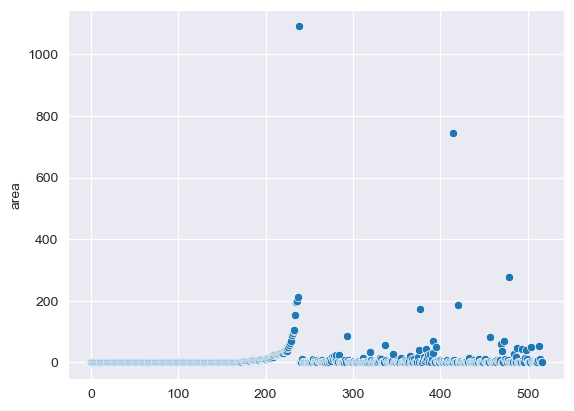

In [53]:
sns.scatterplot(datafile["area"])

<Axes: >

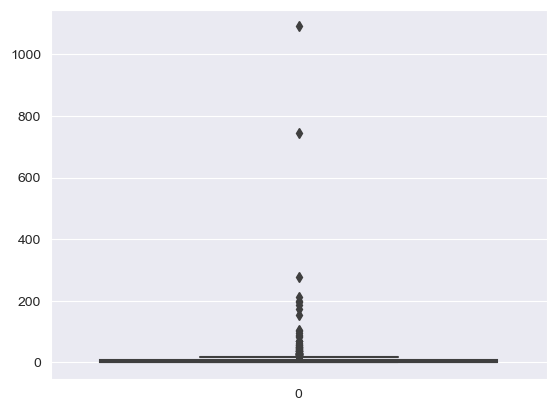

In [78]:
sns.boxplot(datafile["area"])

<Axes: xlabel='rain', ylabel='Count'>

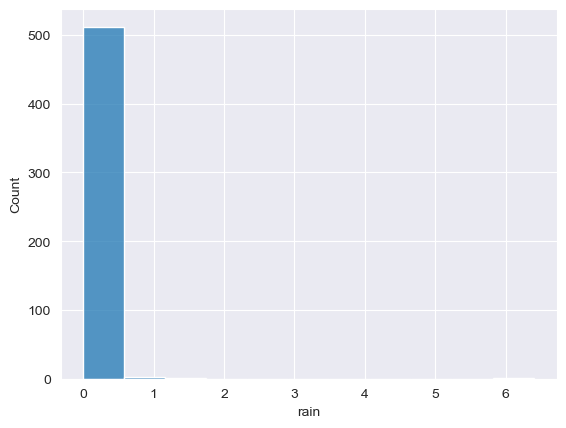

In [55]:
sns.histplot(datafile["rain"])

# Initial Thoughts 

It is possible to see in the burned area column two extreme outliers of 1090.84 ha burned and 746.28 ha. In order to keep our data more concise for the linear regression we can futrely decide to drop these row if the value greatly affects the results of our predictions. Furthermore we can also observe in a larger frequency values under the value of 200 ha and 300 ha burned, demonstrating that perhaps an specific combination of environmental and metereological parameters have created exceptional value for the 1090.84 and 746.28 area that burned. We can then further analyse the other columns to understand a bit more of our data.

<Axes: xlabel='ISI', ylabel='Count'>

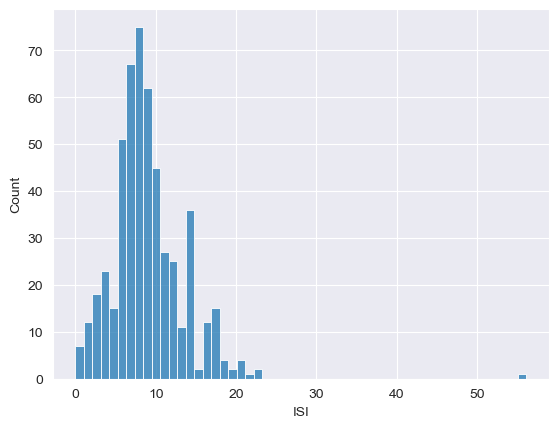

In [56]:
sns.histplot(datafile["ISI"])

<Axes: xlabel='month', ylabel='Count'>

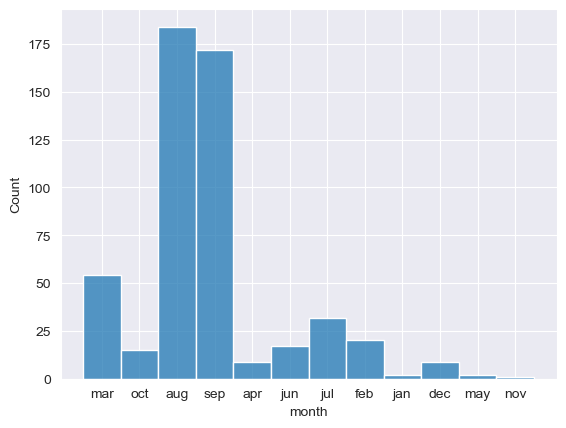

In [57]:
sns.histplot(datafile["month"])

<Axes: ylabel='rain'>

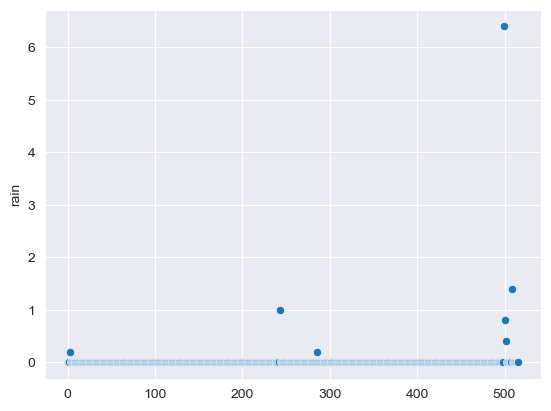

In [58]:
sns.scatterplot(datafile["rain"])

<Axes: xlabel='temp', ylabel='Count'>

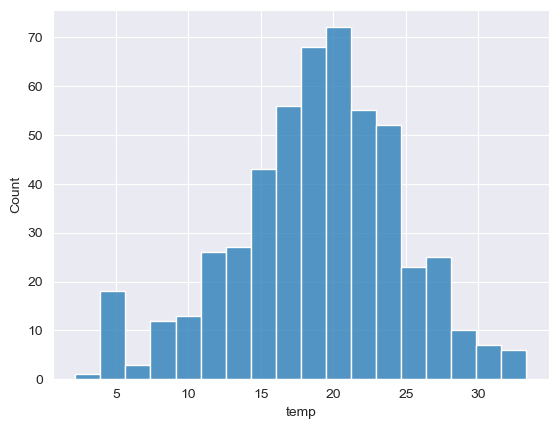

In [59]:
sns.histplot(datafile["temp"])

<Axes: xlabel='RH', ylabel='Count'>

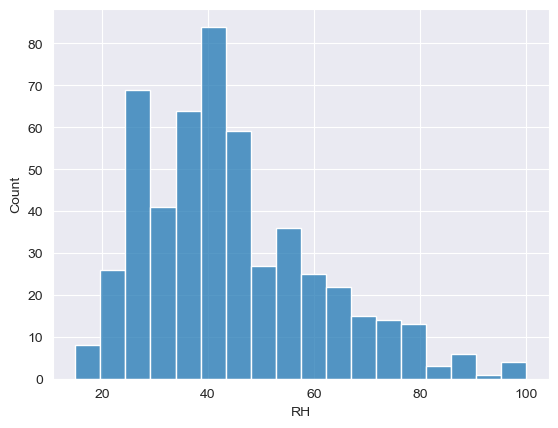

In [60]:
sns.histplot(datafile["RH"])

<Axes: xlabel='temp', ylabel='month'>

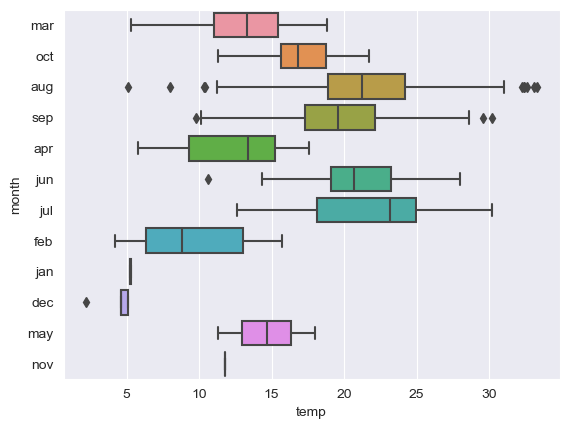

In [61]:
sns.boxplot(y=datafile["month"], x= datafile["temp"])

<Axes: xlabel='temp', ylabel='DMC'>

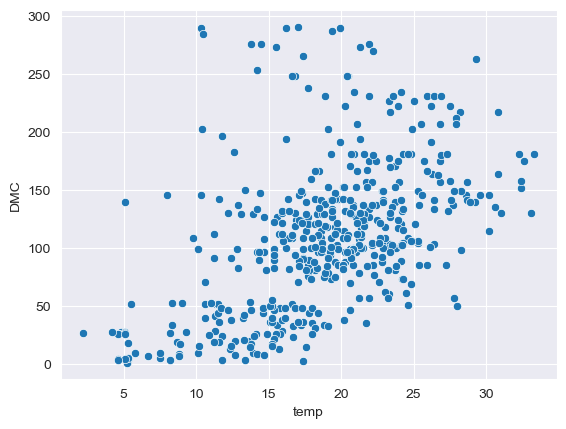

In [62]:
sns.scatterplot(y=datafile["DMC"], x= datafile["temp"])

<Axes: xlabel='temp', ylabel='area'>

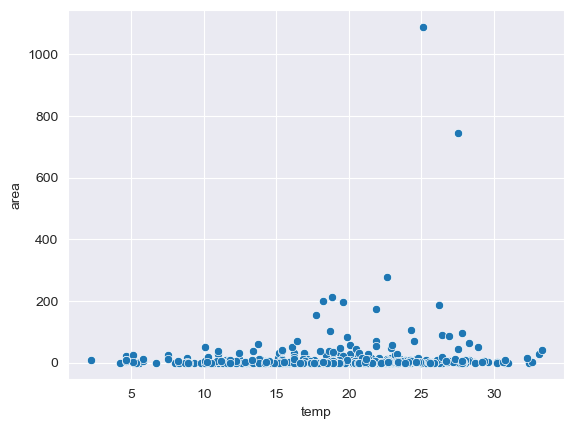

In [63]:
sns.scatterplot(y=datafile["area"], x= datafile["temp"])

<Axes: xlabel='temp', ylabel='ISI'>

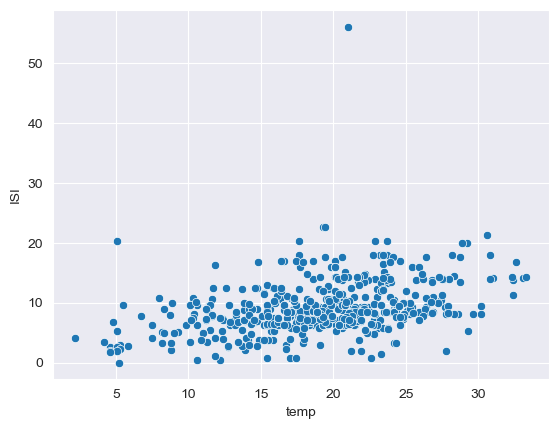

In [64]:
sns.scatterplot(y=datafile["ISI"], x= datafile["temp"])

<Axes: xlabel='temp', ylabel='DC'>

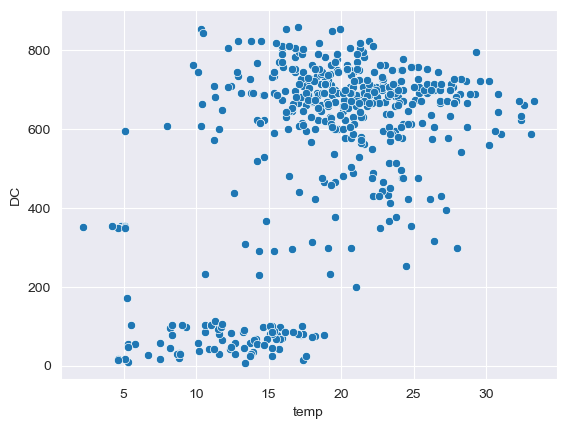

In [65]:
sns.scatterplot(y=datafile["DC"], x= datafile["temp"])

<Axes: xlabel='month', ylabel='temp'>

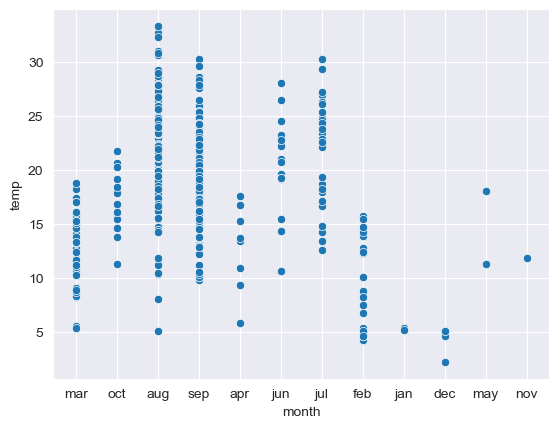

In [66]:
# scatter plot of month & temperature
sns.scatterplot(data=datafile, x="month", y="temp")

<Axes: xlabel='temp', ylabel='area'>

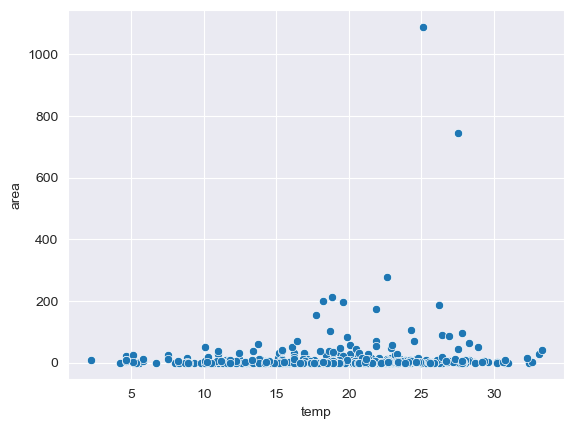

In [67]:
sns.scatterplot(y=datafile["area"], x= datafile["temp"])


<Axes: xlabel='month', ylabel='area'>

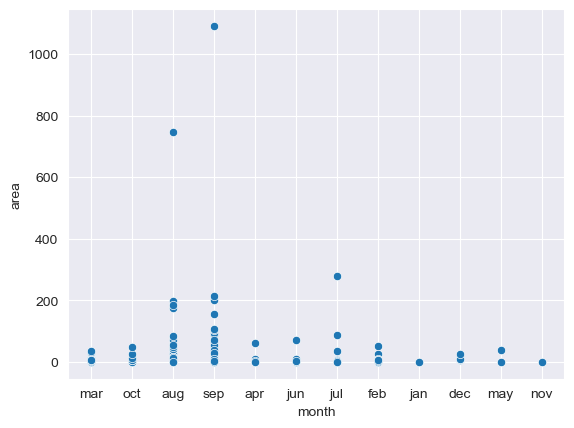

In [68]:
# scatter plot of month & area
sns.scatterplot(data=datafile, x="month", y="area")

<Axes: xlabel='rain', ylabel='area'>

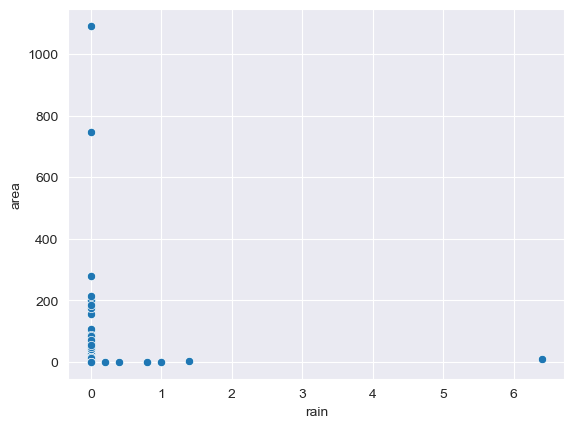

In [69]:
# scatter plot of area & rain
sns.scatterplot(data=datafile, x="rain", y="area")

In [70]:
highest_rain = datafile.sort_values(by='rain', ascending=False)[['month', 'day', 'rain']].head()
highest_rain

,month,day,rain
499,aug,tue,6.4
509,aug,fri,1.4
243,aug,sun,1.0
500,aug,tue,0.8
501,aug,tue,0.8


<Axes: xlabel='wind', ylabel='area'>

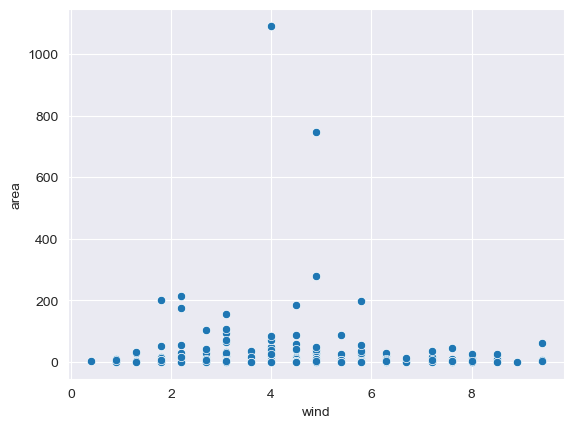

In [71]:
# scatter plot of month & temperature
sns.scatterplot(data=datafile, x="wind", y="area")

In [72]:
df_drop = datafile.drop("month", axis= 1).drop("day", axis=1)
correlation_matrix = df_drop.corr()

<Axes: >

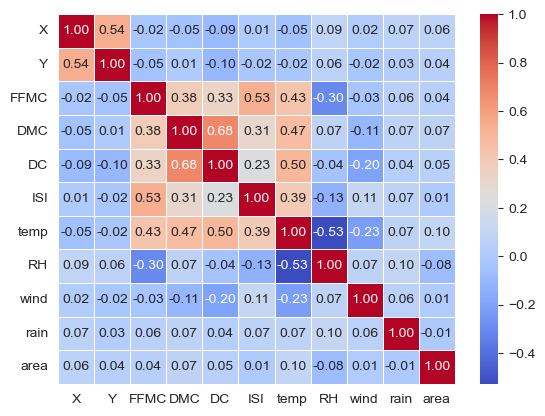

In [73]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

<Axes: >

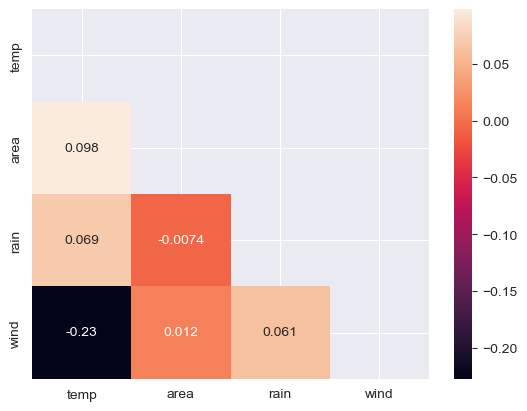

In [74]:
# plot a correlation heat map of selected columns in the dataset
selected_cols = ["temp", "area", "rain", "wind"]

mask = np.triu(np.ones_like(datafile[selected_cols].corr(), dtype=bool))

sns.heatmap(datafile[selected_cols].corr(), annot=True, mask=mask)

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


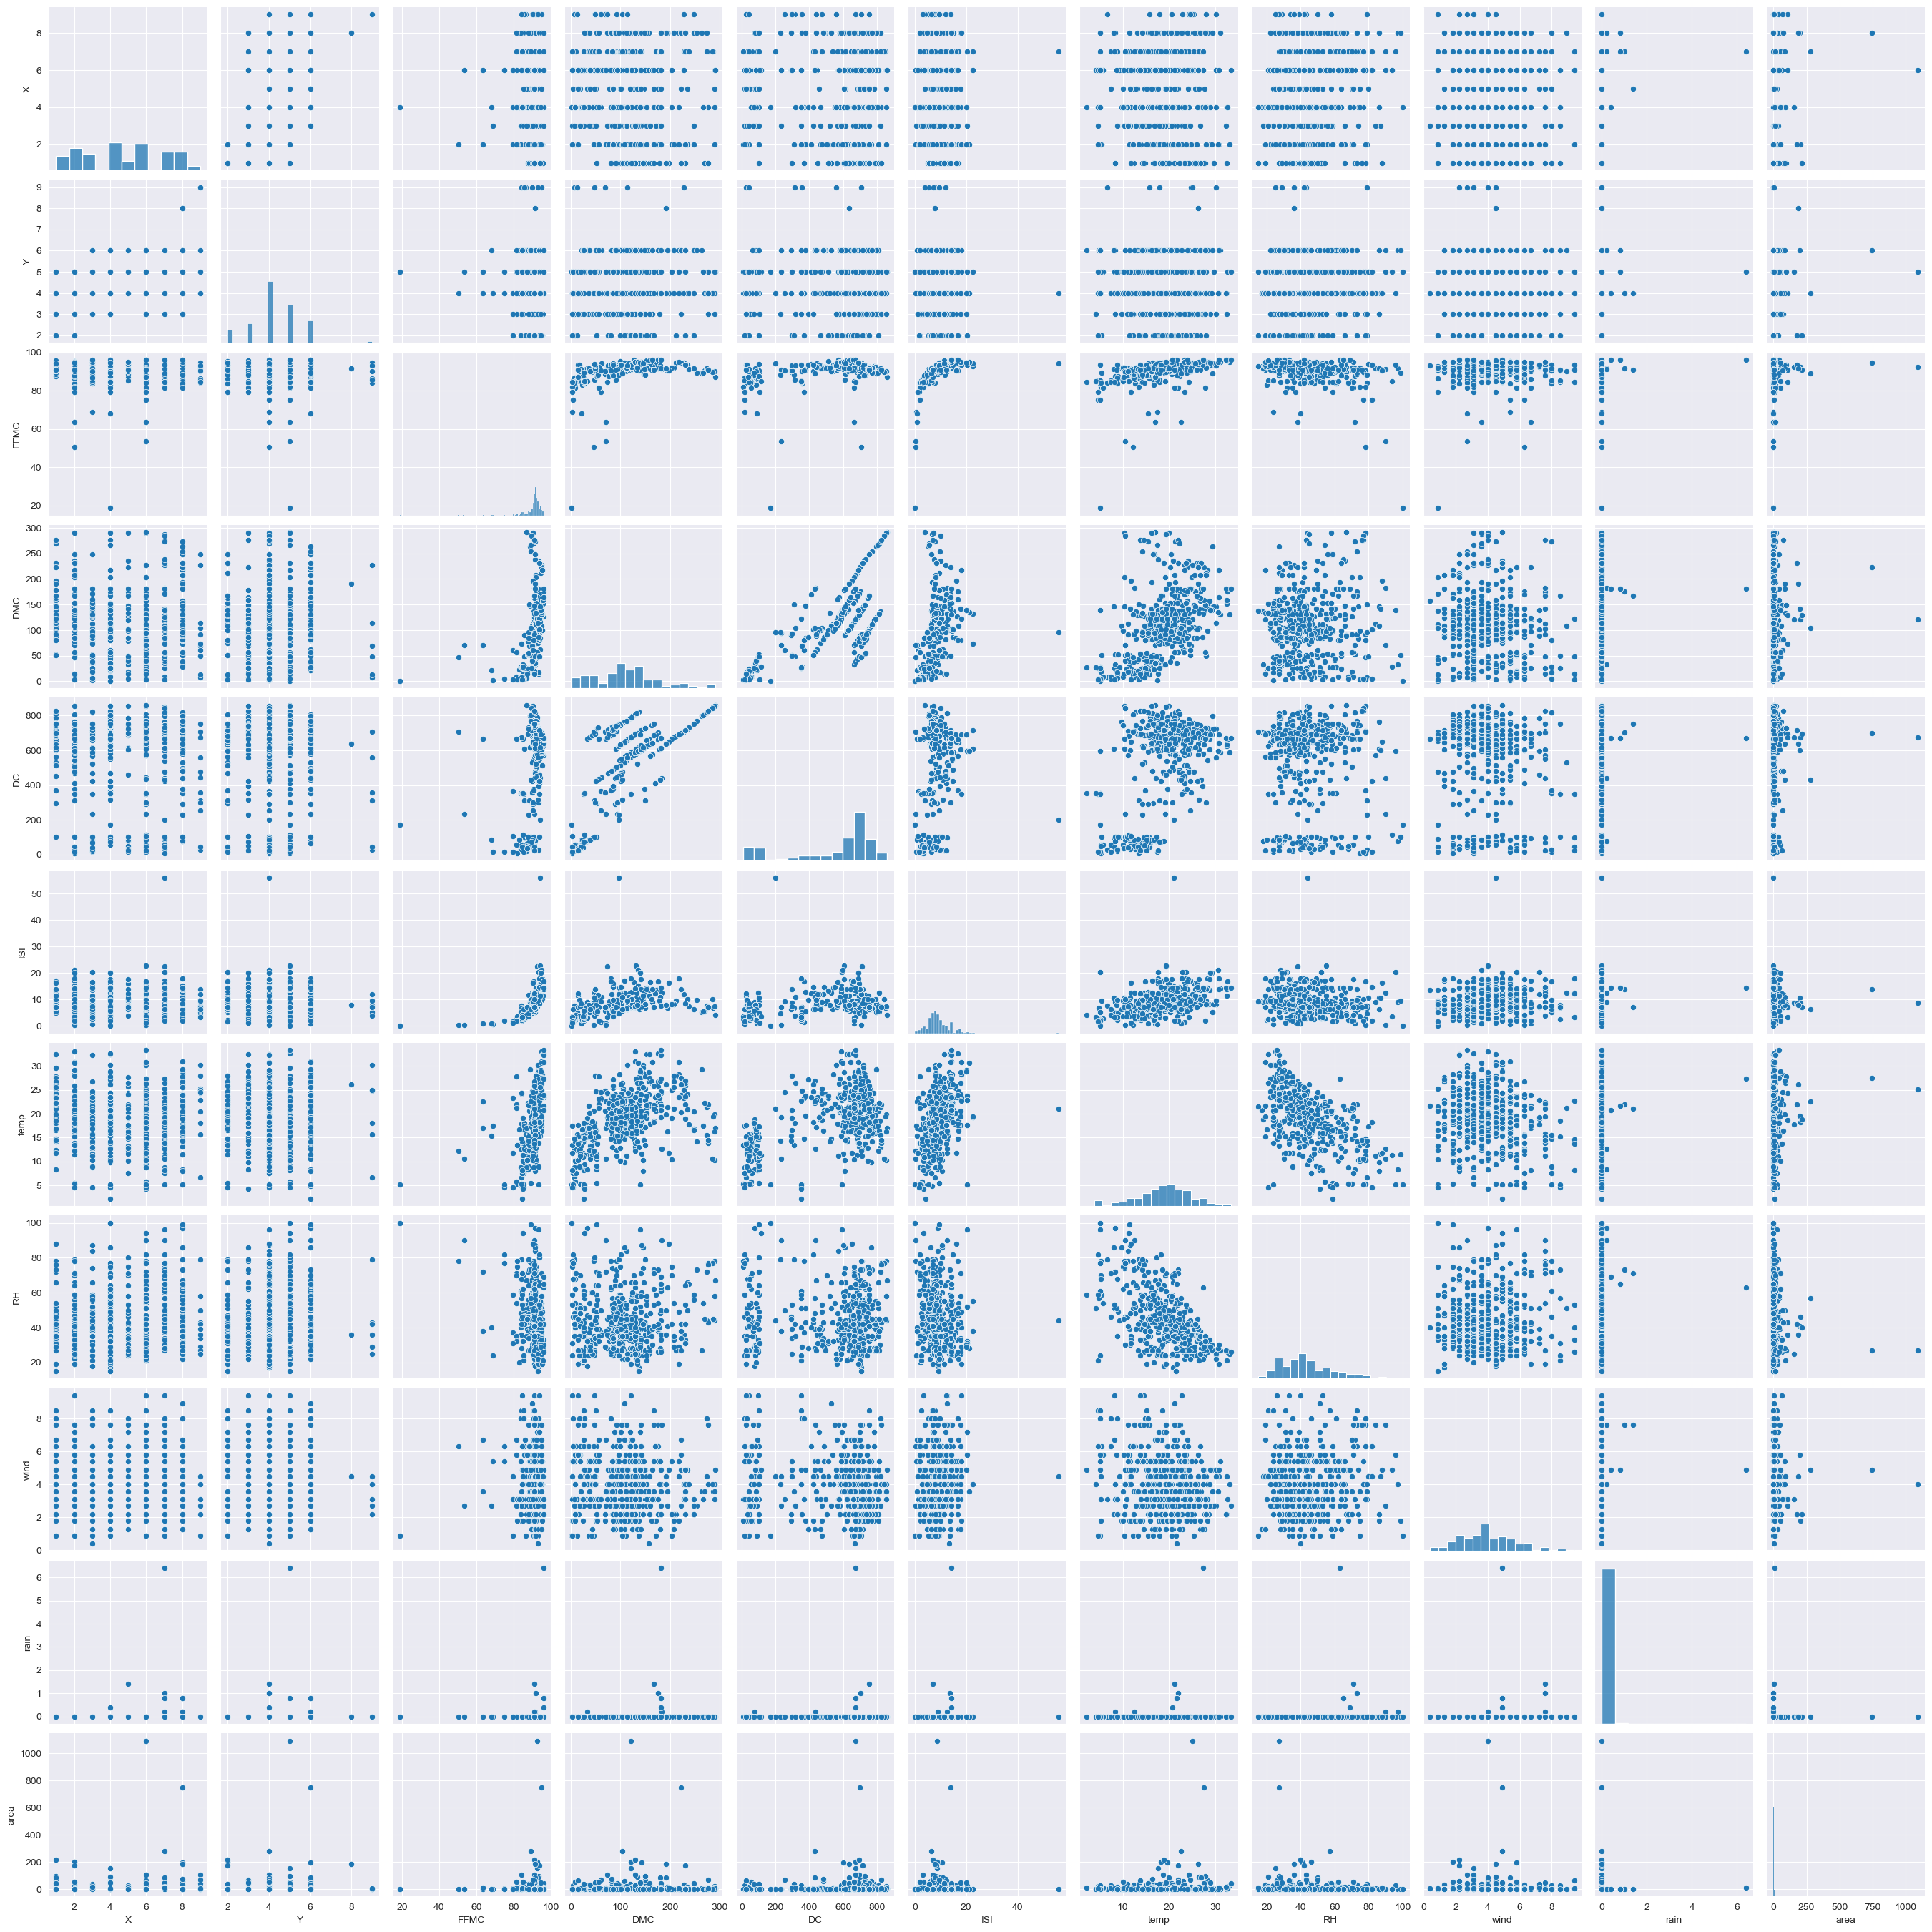

In [75]:
# Look for relation between all variables
sns.set_style('darkgrid')
sns.pairplot(datafile)


c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


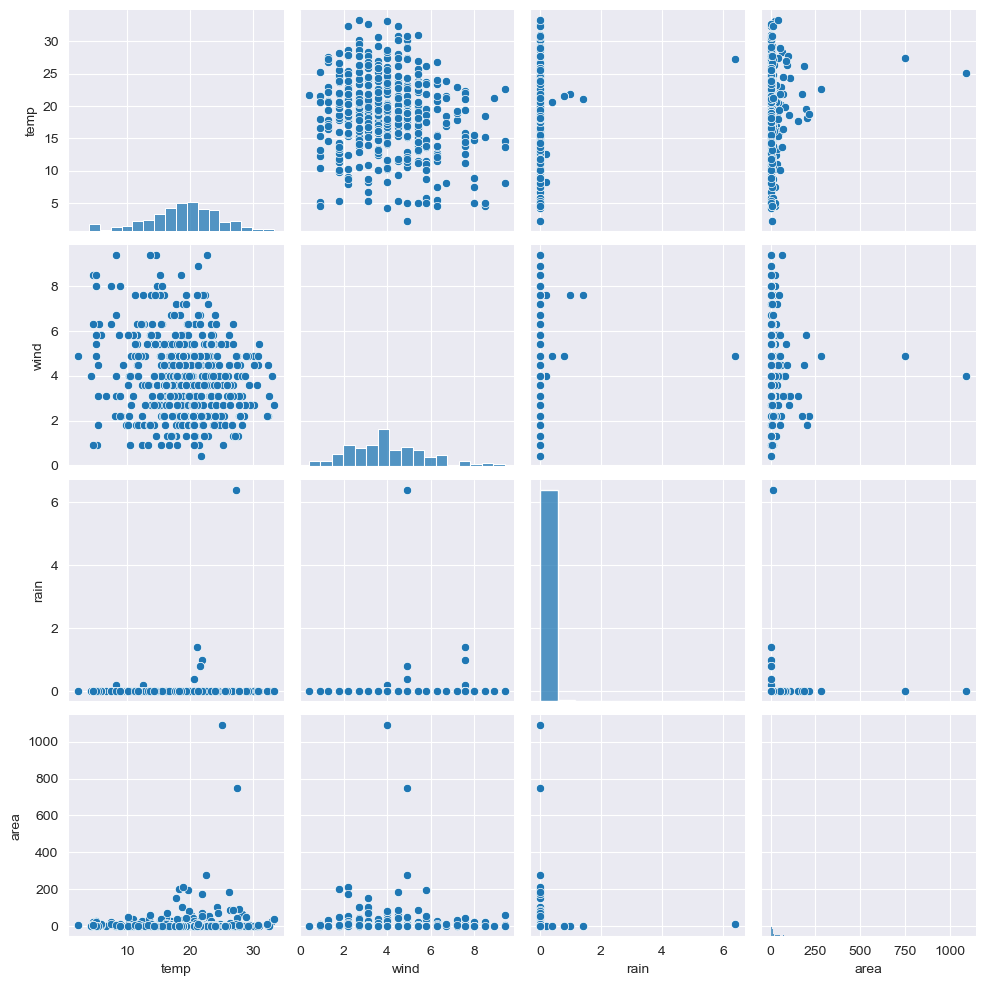

In [76]:
# Look for relation between temp, wind, rain, and area
sns.set_style('darkgrid')
sns.pairplot(datafile[["temp", "wind", "rain", "area"]])


# Final Impressions

We analyzed the data and created visualizations using seaborn and matplotlib. Our analysis showed that there are 13 total columns and 517 rows. There are also 3 datatypes: int64, object, and float64 and no missing values in the dataset.

As we see from our exploration, the highest fire around the area is when the temperature is around 25 to 30. We also saw that the highest rain month is August. In the heatmap, the lighter color shows the higher correlation between two variables and the darker color has less relationship. We can see that the highest correlation is between area and temperature and the negative correlation between temperature and wind.